# Setup environment

In [1]:
# shared tools and data folder
source /home/student/USER/miniconda.sh
conda activate anders
TOOL_PATH=/home/student/opt/anders # for standalone tool script including java package
SHARED_PATH=/home/tch_wyd/myname/shared # For reference database
INPUT_PATH=/home/tch_wyd/myname/inputs/pca  # for input data

(base) (anders) (anders) (anders) (anders) 


In [2]:
mkdir -p ~/sysu_day4_pca

cd ~/sysu_day4_pca

cp -sf ${SHARED_PATH}/pca_*.json .
cp -sf ${SHARED_PATH}/visFuns.R .
cp -sf ${SHARED_PATH}/newPlotPlink.R .

(anders) (anders) (anders) (anders) (anders) (anders) (anders) 


In [3]:
# set up R working space
work_d <- path.expand("~/sysu_day4_pca")
setwd(work_d)
genetic_map_38 <- "/home/tch_wyd/myname/shared/locuszoom_ref/hg38/genetic_map_GRCh38_chr"
refgene_38 <- "/home/tch_wyd/myname/shared/locuszoom_ref/refGeneHG38.gz"

source("./visFuns.R")
source("./newPlotPlink.R")

In [4]:
# set up python working space
import os
work_d = os.path.expanduser("~/sysu_day4_pca")
os.chdir(work_d)

# Simple example of PCA and MDS

First let's try to perform PCA and MDS on the small matrix from the slides. The below code will input the genotypes into R. 


In [5]:
#read in data from slides
G <-matrix(c(1,0,2,0,2,0,2,1,1,1,0,1,0,2,1,2,1,1,1,1,1,0,1,0,2,0,1,1,0,2,1,2,0,1,0),5,by=T,
           dimnames=list(paste0("IND",1:5),paste0("SNP",1:7)))
nInd <- nrow(G)

print(G)

     SNP1 SNP2 SNP3 SNP4 SNP5 SNP6 SNP7
IND1    1    0    2    0    2    0    2
IND2    1    1    1    0    1    0    2
IND3    1    2    1    1    1    1    1
IND4    0    1    0    2    0    1    1
IND5    0    2    1    2    0    1    0


In [6]:
## run the code to start a quiz
from jupyterquiz import display_quiz
display_quiz('pca_quiz1.json')


<IPython.core.display.Javascript object>

## MDS 

Let's try to do MDS. First let's calculate the distance. The simple distance measure as seen in the slides is called a Manhattan distance.


In [42]:

## continue in R
D<-dist(G,upper=T,diag=T,method="manhattan")
D


     IND1 IND2 IND3 IND4 IND5
IND1    0    3    7   10   11
IND2    3    0    4    7    8
IND3    7    4    0    5    4
IND4   10    7    5    0    3
IND5   11    8    4    3    0


 - How many dimensions are used to represent the distances?

Now let's reduce the number of dimension to 2 using MDS and plot the results:

In [45]:
k2 <- cmdscale(D,k=2)

cat("\n Dimension reduction to two dimensions")
k2
cat("\n original Distance between individuals:")
org <- dist(G,upper=T,diag=T,method="manha")
org 

cat("\n Distance between individuals in from the MDS:")
round(D_k2<- dist(k2,upper=T,diag=T),2)





 Dimension reduction to two dimensions

IND1,-6.114866,0.2977272
IND2,-3.077094,0.2402932
IND3,0.621230,-1.7944048
IND4,3.723118,2.1483083
IND5,4.847612,-0.8919238



 original Distance between individuals:

     IND1 IND2 IND3 IND4 IND5
IND1    0    3    7   10   11
IND2    3    0    4    7    8
IND3    7    4    0    5    4
IND4   10    7    5    0    3
IND5   11    8    4    3    0


 Distance between individuals in from the MDS:

      IND1  IND2  IND3  IND4  IND5
IND1  0.00  3.04  7.05 10.01 11.03
IND2  3.04  0.00  4.22  7.06  8.01
IND3  7.05  4.22  0.00  5.02  4.32
IND4 10.01  7.06  5.02  0.00  3.24
IND5 11.03  8.01  4.32  3.24  0.00

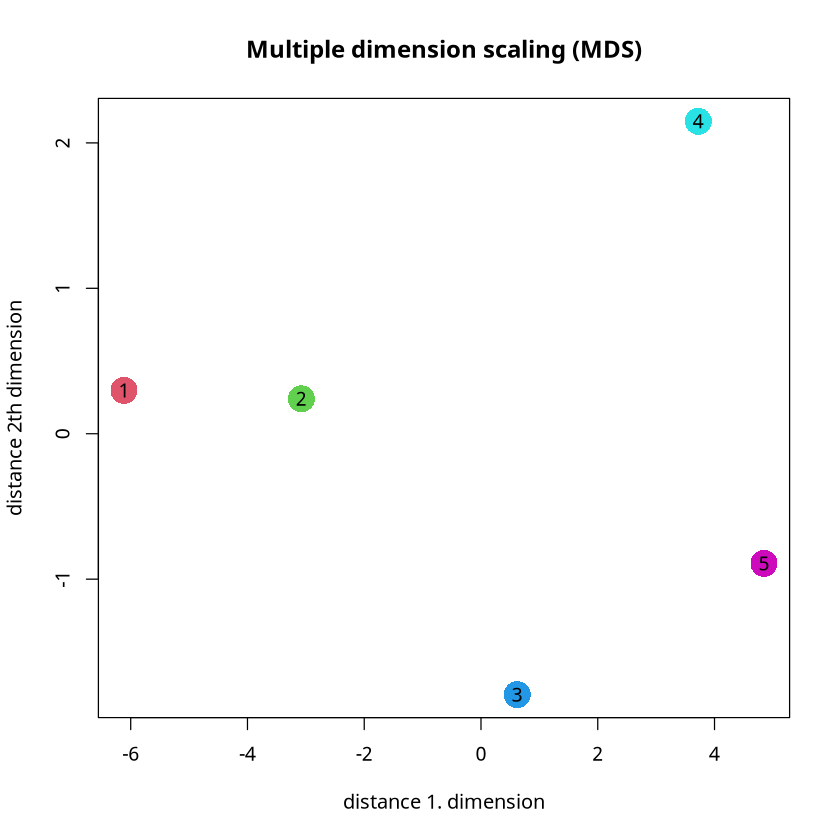

In [9]:
#plot the results
 plot(k2,pch=16,cex=3,col=1:5+1,ylab="distance 2th dimension",xlab="distance 1. dimension",main="Multiple dimension scaling (MDS)")
 points(k2,pch=as.character(1:5))



 - Can you find any difference in the pairwise distances from the plot and the original pairwise distances?. 

## PCA
First let's try to perform PCA directy on the normalized genotypes without calculating the covariance matrix

 - Why do we normalize the genotypes?

 

In [47]:
 #first normalize the data do that the mean and variance is the same for each SNP
normalize <- function(x){
    nInd <- nrow(x)
    avg <- colMeans(x)
    M <- x - rep(colMeans(x),each=nInd)
    M <- M/sqrt(2*rep(avg/2*(1-avg/2),each=nInd))
    M
}
print(G)
 M <- normalize(G)
print(M)

cat("Dimension of M")
dim(M)

 svd <- svd(M)
 ## print the decomposition for M=SDV
 ## u is the eigenvectors
 ## d is eigen values
 print(svd)


     SNP1 SNP2 SNP3 SNP4 SNP5 SNP6 SNP7
IND1    1    0    2    0    2    0    2
IND2    1    1    1    0    1    0    2
IND3    1    2    1    1    1    1    1
IND4    0    1    0    2    0    1    1
IND5    0    2    1    2    0    1    0
           SNP1       SNP2      SNP3      SNP4       SNP5       SNP6       SNP7
IND1  0.6172134 -1.7320508  1.414214 -1.414214  1.7320508 -0.9258201  1.1547005
IND2  0.6172134 -0.2886751  0.000000 -1.414214  0.2886751 -0.9258201  1.1547005
IND3  0.6172134  1.1547005  0.000000  0.000000  0.2886751  0.6172134 -0.2886751
IND4 -0.9258201 -0.2886751 -1.414214  1.414214 -1.1547005  0.6172134 -0.2886751
IND5 -0.9258201  1.1547005  0.000000  1.414214 -1.1547005  0.6172134 -1.7320508


[1] 0.7142857

Dimension of M

[1] 5 7

$d
[1] 5.261803e+00 2.053667e+00 1.566501e+00 9.253336e-01 3.683363e-16

$u
            [,1]        [,2]       [,3]       [,4]      [,5]
[1,] -0.64933919 -0.09424370 -0.5834128 -0.1706056 0.4472136
[2,] -0.35989402 -0.07538164  0.5914222  0.5612608 0.4472136
[3,]  0.07799398  0.60916998  0.3226848 -0.5645382 0.4472136
[4,]  0.39798601 -0.72856890  0.1094660 -0.3143433 0.4472136
[5,]  0.53325321  0.28902426 -0.4401602  0.4882264 0.4472136

$v
           [,1]       [,2]         [,3]       [,4]        [,5]
[1,] -0.2730876  0.3302541  0.325740175 -0.2899575  0.67825920
[2,]  0.3457940  0.6975136  0.429315165  0.1470835 -0.16940546
[3,] -0.2814894  0.4368143 -0.625520546  0.2196783  0.31700095
[4,]  0.5215403 -0.1858741 -0.305776626 -0.3312989  0.39424401
[5,] -0.4335716  0.2426873 -0.232855131 -0.5373485 -0.48000169
[6,]  0.2959595  0.1274489 -0.007889476 -0.6514342 -0.07079443
[7,] -0.4231225 -0.3223520  0.412944032 -0.1521959  0.14119077



The above is the decomposition of the genotypes into the diagonal matrix (d) with eigenvalues, and the left (u) and right (v) eigenvectors such that
$M=U\Sigma V^T$
where $\Sigma$ has the diagonal values of d. Therefore, we can reconstruct the normalized genotypes from U, d and v:


In [11]:
##make a diagonal matrix with the eigenvalues
SIGMA <-  diag(svd$d)
print(SIGMA)
## using the matrixes from the decomposition we can undo the transformation of our normalized genotypes
M2 <- svd$u%*%SIGMA%*%t(svd$v)
cat("Original normalized genotypes (M):")
round(M,3)
cat("Reconstructed normalized genotypes(M2):")
round(M2,3)

         [,1]     [,2]     [,3]      [,4]         [,5]
[1,] 5.261803 0.000000 0.000000 0.0000000 0.000000e+00
[2,] 0.000000 2.053667 0.000000 0.0000000 0.000000e+00
[3,] 0.000000 0.000000 1.566501 0.0000000 0.000000e+00
[4,] 0.000000 0.000000 0.000000 0.9253336 0.000000e+00
[5,] 0.000000 0.000000 0.000000 0.0000000 3.683363e-16
Original normalized genotypes (M):

,SNP1,SNP2,SNP3,SNP4,SNP5,SNP6,SNP7
IND1,0.617,-1.732,1.414,-1.414,1.732,-0.926,1.155
IND2,0.617,-0.289,0.000,-1.414,0.289,-0.926,1.155
IND3,0.617,1.155,0.000,0.000,0.289,0.617,-0.289
IND4,-0.926,-0.289,-1.414,1.414,-1.155,0.617,-0.289
IND5,-0.926,1.155,0.000,1.414,-1.155,0.617,-1.732


Reconstructed normalized genotypes(M2):

0.617,-1.732,1.414,-1.414,1.732,-0.926,1.155
0.617,-0.289,0.000,-1.414,0.289,-0.926,1.155
0.617,1.155,0.000,0.000,0.289,0.617,-0.289
-0.926,-0.289,-1.414,1.414,-1.155,0.617,-0.289
-0.926,1.155,0.000,1.414,-1.155,0.617,-1.732


 - Did the reconstruction of the normalized genotypes work?
 - Would you be able to reconstruct the unnormalized (raw) genotypes?

Now try performing PCA based on the covariance matrix instead. To do so we first calculate the covariance matrix:


In [48]:
 ## calculate the covariance matrix
C <- M %*% t(M)
 print(C)


          IND1       IND2       IND3       IND4      IND5
IND1 12.571429  5.5714286 -2.0238095 -6.9761905 -9.142857
IND2  5.571429  4.7380952 -0.7738095 -3.7261905 -5.809524
IND3 -2.023810 -0.7738095  2.2619048 -0.7738095  1.309524
IND4 -6.976190 -3.7261905 -0.7738095  6.7380952  4.738095
IND5 -9.142857 -5.8095238  1.3095238  4.7380952  8.904762


The covariance matrix also shows the relationship between each individuals with the most similar individuals having a high positive value while the most distant individuals having a negativ value. However, unlike the euclidian distance the diagonal is not zero but instead is it related to the diversity within each individual.

Now let's try to do PCA on this covariance matrix instead

First pricipal component:[1]  0.64933919  0.35989402 -0.07799398 -0.39798601 -0.53325321
Eigenvalues:[1] 27.6866  4.2175  2.4539  0.8562  0.0000


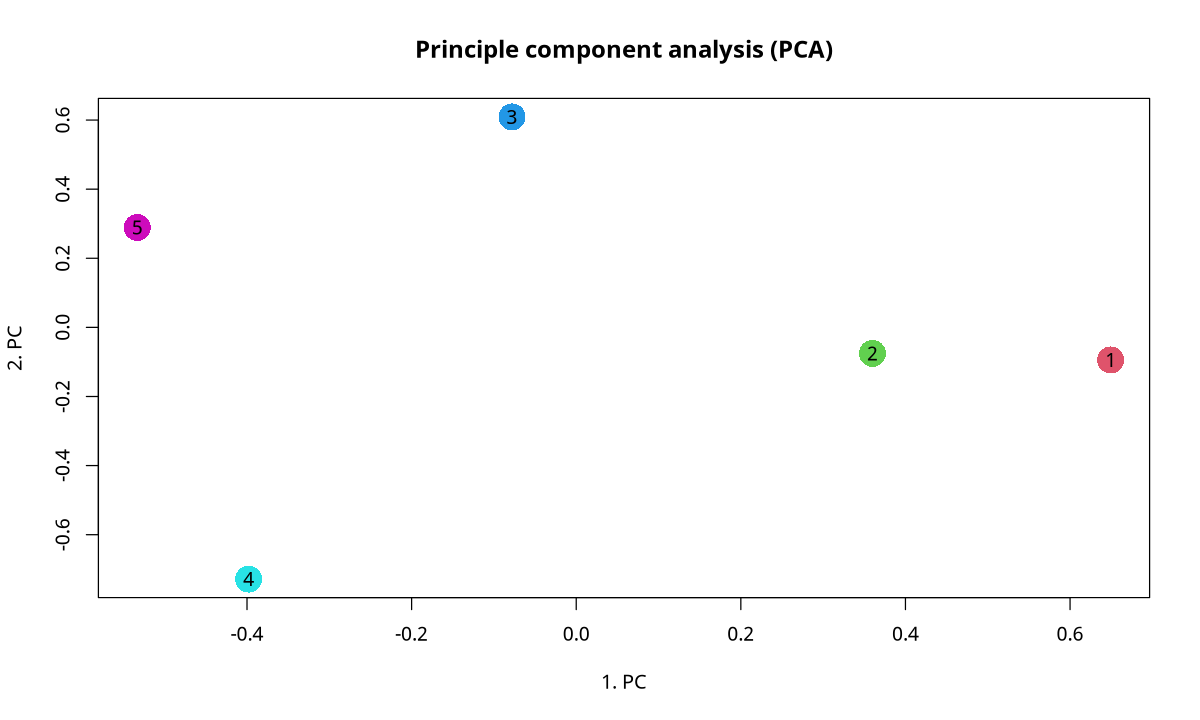

In [49]:
 ## then perform the PCA by singular value decomposition
 e <- eigen(C)

 ## print first PC
cat("First pricipal component:")
 print(e$vectors[,1])
 ## print first PC
cat("Eigenvalues:")
 print(round(e$values,4))
 ##plot 2 first PC. for the 5 indiviudals
 plot(e$vectors[,1:2],pch=16,cex=3,col=1:5+1,ylab="2. PC",xlab="1. PC",main="Principle component analysis (PCA)")
 points(e$vectors[,1:2],pch=as.character(1:5))
 




 - Do you get the same results using the covariance matrix as using the normalized genotypes directly?
 - Compare the two plots (MDS vs. PCA). Are the capturing the same thing? 

Bonus information:

Unlike MDS, PCA will not remove information, so you are actually able to reconstruct your covariance matrix from the principal components.

In [14]:
##continue in R
##make a diagonal matrix with the eigenvalues
SIGMA <- diag(e$value)

## transform the PC back to the original data
## using matrix multiplication V SIGMA Vt
out <- e$vectors %*% SIGMA %*% t(e$vectors)
cat("Reconstructed covariance:")
print(out)
cat("Original covariance:")
print(C)
#close R after you are done

Reconstructed covariance:          [,1]       [,2]       [,3]       [,4]      [,5]
[1,] 12.571429  5.5714286 -2.0238095 -6.9761905 -9.142857
[2,]  5.571429  4.7380952 -0.7738095 -3.7261905 -5.809524
[3,] -2.023810 -0.7738095  2.2619048 -0.7738095  1.309524
[4,] -6.976190 -3.7261905 -0.7738095  6.7380952  4.738095
[5,] -9.142857 -5.8095238  1.3095238  4.7380952  8.904762
Original covariance:          IND1       IND2       IND3       IND4      IND5
IND1 12.571429  5.5714286 -2.0238095 -6.9761905 -9.142857
IND2  5.571429  4.7380952 -0.7738095 -3.7261905 -5.809524
IND3 -2.023810 -0.7738095  2.2619048 -0.7738095  1.309524
IND4 -6.976190 -3.7261905 -0.7738095  6.7380952  4.738095
IND5 -9.142857 -5.8095238  1.3095238  4.7380952  8.904762


Try to also compare the eigenvalues from the decomposition of the normalized genotypes and from the covariance matrix

In [51]:
cat("Eigenvalues of the covariance matrix:")
 print(round(e$values,4))

cat("Singular values from the normalized genotypes:")
 print(round(svd$d^2,4))

Eigenvalues of the covariance matrix:[1] 27.6866  4.2175  2.4539  0.8562  0.0000
Singular values from the normalized genotypes:[1] 27.6866  4.2175  2.4539  0.8562  0.0000


In [51]:
cat("Eigenvalues of the covariance matrix:")
 print(round(e$values,4))

cat("Singular values from the normalized genotypes:")
 print(round(svd$d^2,4))

Eigenvalues of the covariance matrix:[1] 27.6866  4.2175  2.4539  0.8562  0.0000
Singular values from the normalized genotypes:[1] 27.6866  4.2175  2.4539  0.8562  0.0000


 - What is the relationship? (hint: try to square one of them by changing the above code)

#  PCA for low depth sequencing using PCAngsd 


In this exercise we will try to use PCAngsd to analyse the same data used in the NGSadmix exercises. 

Genotype likelihoods for variable sites was estimated from of bam files with low depth NGS data from the 1000 genomes project:


| Population code | Population                                     | Sample size |
|-----------------|------------------------------------------------|-------------|
| ASW             | HapMap African ancestry individuals from SW US | 61          |
| CEU             | European individuals                           | 99          |
| CHB             | Han Chinese in Beijing                         | 103         |
| YRI             | Yoruba individuals from Nigeria                | 108         |
| MXL             | Mexican individuals from LA California         | 63          |


In [16]:
# Make new folder and set path to that folder
#make folder 
mkdir -p ~/sysu_day4_pca/pca

cp -sf ${INPUT_PATH}/1000G5popsAdmixK3seed3.qopt ./pca/
cp -sf ${INPUT_PATH}/1000G5popsAdmixK4seed9.qopt ./pca/

##make links to files and add them to the folder
# links to genotype likelihood file ( from admixture analysis )
cp -sf ${INPUT_PATH}/1000G5pops.inputgl.beagle.gz ./pca/

# link to population information file
cp -sf ${INPUT_PATH}/1000G5pops.pop.info ./pca

echo -e "\n--- files in folder ---"
ls ./pca


echo -e "\n--programs that are installed:--"
which pcangsd


(anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) 
--- files in folder ---
(anders) 1000G5popsAdmixK3seed3.qopt   EUsmall.cov             PCANGSD1000G.admix.4.Q
1000G5popsAdmixK4seed9.qopt   EUsmall.log             PCANGSD1000G.cov
1000G5pops.inputgl.beagle.gz  EUsmall.selection       PCANGSD1000G_iter0.cov
1000G5pops.pop.info           EUsmall.sites           PCANGSD1000G_iter0.log
eu1000g.sample.Info           EUsmall.sites.info      PCANGSD1000G.log
eu1000g.small.beagle.gz       PCANGSD1000G.admix.4.P
(anders) (anders) (anders) 
--programs that are installed:--
(anders) /home/student/miniconda3/envs/anders/bin/pcangsd
(anders) 


Look inside the first lines in the population informaiton file

In [17]:
head ./pca/1000G5pops.pop.info

YRI	NA18486
YRI	NA18488
YRI	NA18489
YRI	NA18498
YRI	NA18499
YRI	NA18501
YRI	NA18502
YRI	NA18504
YRI	NA18505
YRI	NA18507
(anders) 



See the number of individuals for each population from the sample file

In [18]:
# summaries the fist column
cut -f1 ./pca/1000G5pops.pop.info |  uniq -c


(anders)     108 YRI
     61 ASW
     99 CEU
     64 MXL
    103 CHB
(anders) 


Count the number of lines in the genotype likelihood file

In [19]:
zcat ./pca/1000G5pops.inputgl.beagle.gz | wc -l 

102313
(anders) 


In [20]:
from jupyterquiz import display_quiz
display_quiz('pca_pcangsd_quiz.json')


<IPython.core.display.Javascript object>

 
 ## Run PCANGSD to perform PCA
 First let's get a list of the options in PCAngsd


In [21]:
pcangsd -h

usage: pcangsd [-h] [--version] [-b FILE] [-p FILE-PREFIX] [-e INT] [-t INT]
               [-o OUTPUT] [--filter FILE] [--filter-sites FILE]
               [--geno-error FLOAT] [--maf FLOAT] [--maf-iter INT]
               [--maf-tole FLOAT] [--hwe FILE] [--hwe-tole FLOAT] [--iter INT]
               [--tole FLOAT] [--selection] [--snp-weights] [--pcadapt]
               [--selection-eig INT] [--inbreed-sites] [--inbreed-samples]
               [--inbreed-iter INT] [--inbreed-tole FLOAT] [--post]
               [--post-inbreed] [--geno FLOAT] [--geno-inbreed FLOAT]
               [--admix] [--admix-K INT] [--admix-iter INT]
               [--admix-tole FLOAT] [--admix-batch INT] [--admix-alpha FLOAT]
               [--admix-seed INT] [--admix-auto FLOAT] [--admix-depth INT]
               [--tree] [--tree-samples FILE] [--maf-save] [--pi-save]
               [--dosage-save] [--sites-save]

options:
  -h, --help            show this help message and exit
  --version             show pr

Run PCANGSD on your genotype likelihood data using 5 CPU threads (will take ~1min)

In [22]:
pcangsd -b ./pca/1000G5pops.inputgl.beagle.gz -o ./pca/PCANGSD1000G -t 2


------------------------------------
PCAngsd v1.36.4
Jonas Meisner and Anders Albrechtsen
Using 2 thread(s)
------------------------------------

Parsing Beagle file.
Loaded 102312 sites and 435 samples.
Estimating minor allele frequencies.
EM (MAF) converged at iteration: 5
Number of sites after MAF filtering (0.05): 102312

Estimating covariance matrix.
Using 3 principal components (MAP test).
Individual allele frequencies estimated (1).
Individual allele frequencies estimated (2).	RMSE=0.0029545
Individual allele frequencies estimated (3).	RMSE=0.0007774
Individual allele frequencies estimated (4).	RMSE=0.0002334
Individual allele frequencies estimated (5).	RMSE=0.0000762
Individual allele frequencies estimated (6).	RMSE=0.0000261
Individual allele frequencies estimated (7).	RMSE=0.0000093
PCAngsd converged.
Saved covariance matrix as ./pca/PCANGSD1000G.cov

Total elapsed time: 0m13s
(anders) 


The program estimates the covariance matrix that can then be used for PCA. Look at the output from the program

 - How many significant PCA was used by PCAngsd (see MAP test in output)?

Plot the results in R

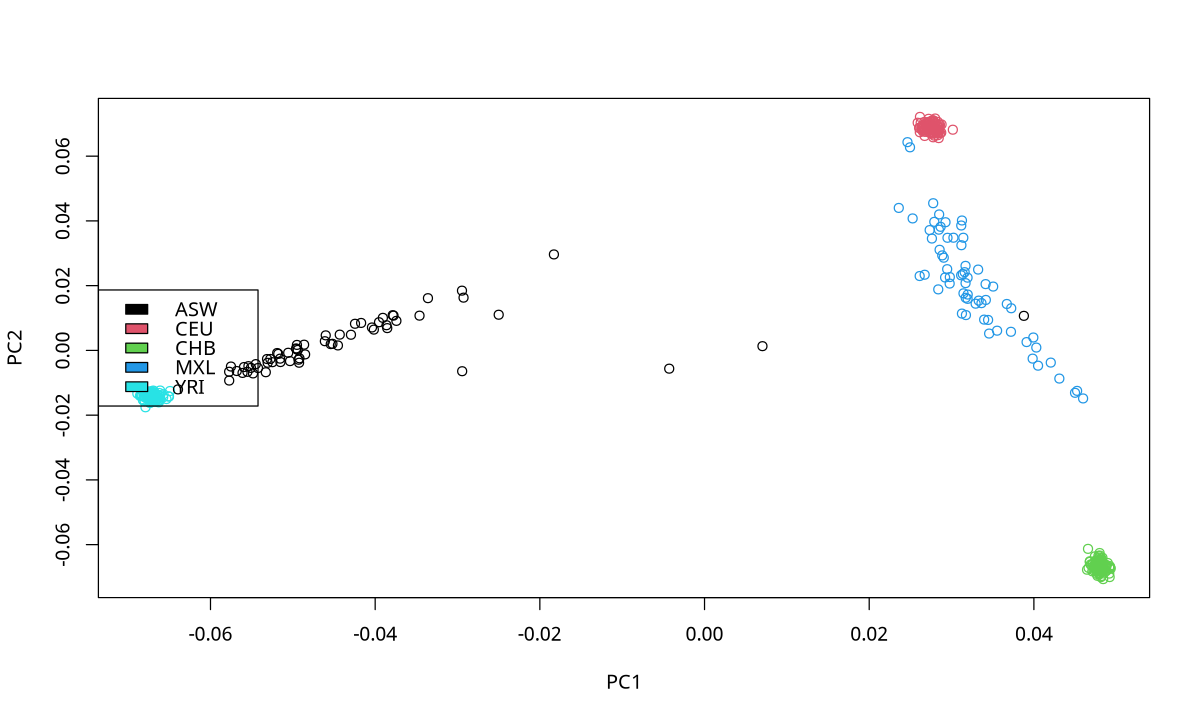

In [54]:
# Read covariance matrix estimated by PCAngsd
C <- as.matrix(read.table("./pca/PCANGSD1000G.cov"))

# Read population labels for each individuals
pop<-read.table("./pca/1000G5pops.pop.info",stringsAsFactors=T)

# Estimate the eigenvectors (principal components) from the covariance matrix
e <- eigen(C)
plot(e$vectors[,c(1,2)],col=pop[,1],xlab="PC1",ylab="PC2")
legend("left",fill=1:5,levels(pop[,1]))

Compare with the estimate admixture proportions (a NGSadmix analysis)



function (x, y, ...) 
UseMethod("plot")
<bytecode: 0x5641e1f09118>
<environment: namespace:base>

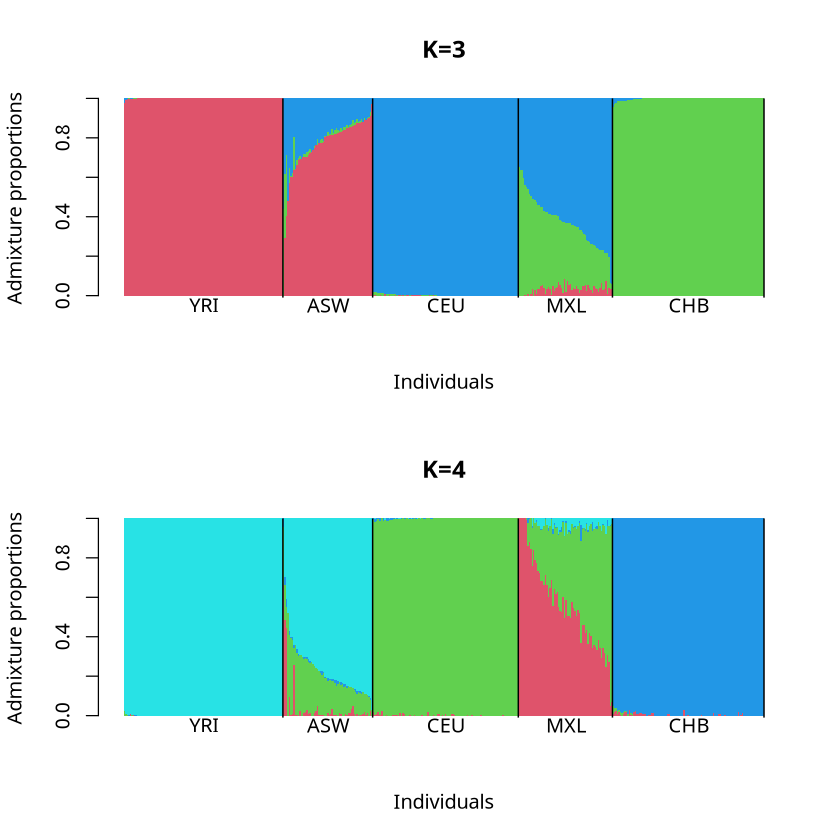

In [24]:
par(mfrow=2:1)
## read and plot the output from NGSadmix from the Tuesday's exercises
pop<-read.table("./pca/1000G5pops.pop.info",as.is=T)
q<-read.table("./pca/1000G5popsAdmixK3seed3.qopt")
ord<-orderInds(pop = pop[,1], q=q) # sort indiivduals by population and within populaoitn by admixture proportion
#plot
barplot(t(q)[,ord],col=2:10,space=0,border=NA,xlab="Individuals",ylab="Admixture proportions",main="K=3")
text(sort(tapply(1:nrow(pop),pop[ord,1],mean)),-0.05,unique(pop[ord,1]),xpd=T) # add population labels
abline(v=cumsum(sapply(unique(pop[ord,1]),function(x){sum(pop[ord,1]==x)})),col=1,lwd=1.2)

## read for K=4
pop<-read.table("./pca/1000G5pops.pop.info",as.is=T)
q<-read.table("./pca/1000G5popsAdmixK4seed9.qopt")
plot
barplot(t(q)[,ord],col=2:10,space=0,border=NA,xlab="Individuals",ylab="Admixture proportions",main="K=4")
text(sort(tapply(1:nrow(pop),pop[ord,1],mean)),-0.05,unique(pop[ord,1]),xpd=T) # add population labels
abline(v=cumsum(sapply(unique(pop[ord,1]),function(x){sum(pop[ord,1]==x)})),col=1,lwd=1.2)

 - In the PCA plot can you identify the Mexicans with only European ancestry?
 - What about the African American with East Asian ancestry?
 - Based on the PCA would you have reached the same conclusion as the admixture proportions?

## What if we use standard softwares that use mean imputation

Try the same analysis but without estimating individual allele frequencies. This is the same as using the first iteration of the algorithm. This is similar to using mean imputation which is used by most PCA software (eigensoft, eigenstrat, smartPCA, NGStools, fastPCA, FlashPCA, plink --fast). 


In [56]:
pcangsd -b ./pca/1000G5pops.inputgl.beagle.gz -o ./pca/PCANGSD1000G_iter0 -t 2 --iter 1

------------------------------------
PCAngsd v1.36.4
Jonas Meisner and Anders Albrechtsen
Using 2 thread(s)
------------------------------------

Parsing Beagle file.
Loaded 102312 sites and 435 samples.
Estimating minor allele frequencies.
EM (MAF) converged at iteration: 5
Number of sites after MAF filtering (0.05): 102312

Estimating covariance matrix.
Using 3 principal components (MAP test).
Individual allele frequencies estimated (1).
Individual allele frequencies estimated (2).	RMSE=0.0029545
PCAngsd did not converge!
Saved covariance matrix as ./pca/PCANGSD1000G_iter0.cov

Total elapsed time: 0m11s
(anders) 


wait for the analysis to finish and then plot the results in R using the code below

In [26]:
ls ./pca/*

./pca/1000G5popsAdmixK3seed3.qopt   ./pca/EUsmall.sites
./pca/1000G5popsAdmixK4seed9.qopt   ./pca/EUsmall.sites.info
./pca/1000G5pops.inputgl.beagle.gz  ./pca/PCANGSD1000G.admix.4.P
./pca/1000G5pops.pop.info           ./pca/PCANGSD1000G.admix.4.Q
./pca/eu1000g.sample.Info           ./pca/PCANGSD1000G.cov
./pca/eu1000g.small.beagle.gz       ./pca/PCANGSD1000G_iter0.cov
./pca/EUsmall.cov                   ./pca/PCANGSD1000G_iter0.log
./pca/EUsmall.log                   ./pca/PCANGSD1000G.log
./pca/EUsmall.selection
(anders) 


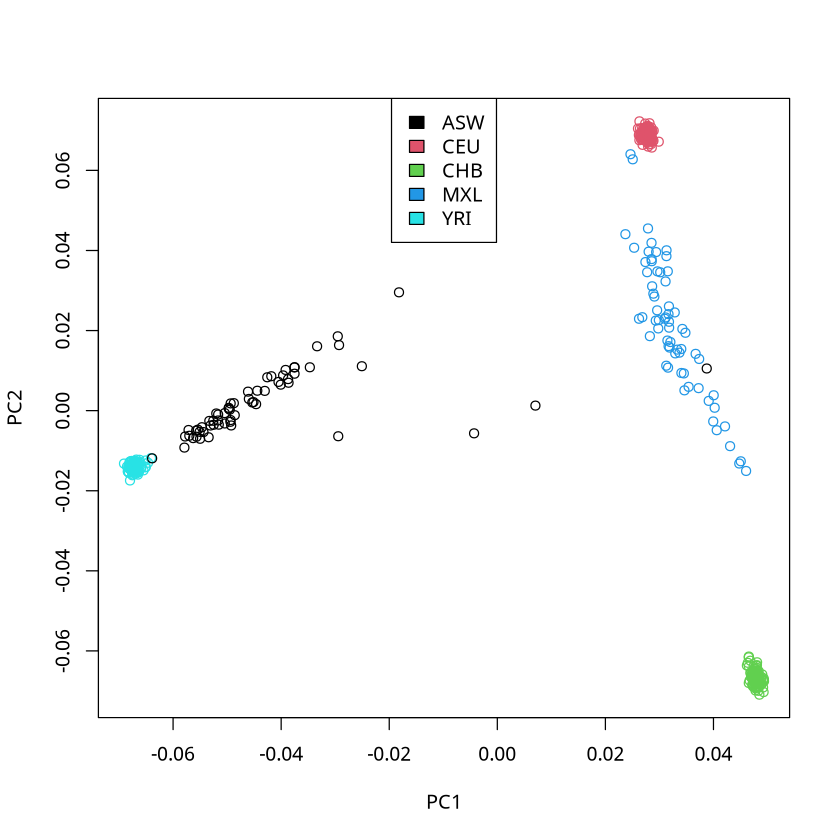

In [27]:
# Read covariance matrix estimated by PCAngsd
C <- as.matrix(read.table("./pca/PCANGSD1000G_iter0.cov"))

# Read population labels for each individuals
pop<-read.table("./pca/1000G5pops.pop.info",stringsAsFactors=T)

# Estimate the eigenvectors (Principal components) from the covariance matrix
e <- eigen(C)
plot(e$vectors[,1:2],col=pop[,1],xlab="PC1",ylab="PC2")
legend("top",fill=1:5,levels(pop[,1]))


 - Do you see any difference?
 - Would any of your conclusions change? (compared to the previous PCA plot)

## Converting a PCA into admixture proportions
Let's try to use the PCA to infer admixture proportions based on the first 2 principal components. For the optimization we will use a small penalty on the admixture proportions (alpha). This is a way to convert your PCA into admixture proportions:


In [28]:

pcangsd -b ./pca/1000G5pops.inputgl.beagle.gz -o ./pca/PCANGSD1000G -t 2 --admix --admix-alpha 50

------------------------------------
PCAngsd v1.36.4
Jonas Meisner and Anders Albrechtsen
Using 2 thread(s)
------------------------------------

Parsing Beagle file.
Loaded 102312 sites and 435 samples.
Estimating minor allele frequencies.
EM (MAF) converged at iteration: 5
Number of sites after MAF filtering (0.05): 102312

Estimating covariance matrix.
Using 3 principal components (MAP test).
Individual allele frequencies estimated (1).
Individual allele frequencies estimated (2).	RMSE=0.0029545
Individual allele frequencies estimated (3).	RMSE=0.0007774
Individual allele frequencies estimated (4).	RMSE=0.0002334
Individual allele frequencies estimated (5).	RMSE=0.0000762
Individual allele frequencies estimated (6).	RMSE=0.0000261
Individual allele frequencies estimated (7).	RMSE=0.0000093
PCAngsd converged.
Saved covariance matrix as ./pca/PCANGSD1000G.cov

Estimating admixture proportions using NMF (CSG-MU).
K=4, Alpha=50.0, Batches=10, Seed=0
CSG-MU (1).	RMSE=0.258245827
CSG-MU (


Plot the results in R



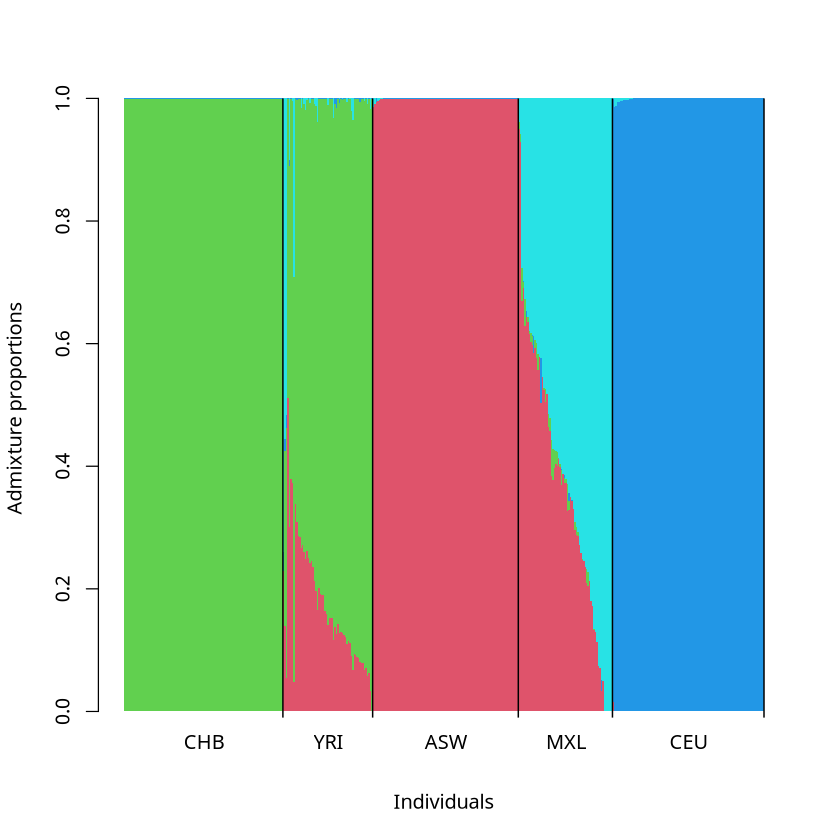

In [29]:
# Read the admixture proportions estimated from the PCA
q<-read.table("./pca/PCANGSD1000G.admix.4.Q")

# Read population labels for each individuals
pop<-read.table("./pca/1000G5pops.pop.info",stringsAsFactors=T)

## Order according to population
ord<-orderInds(pop = pop[,1], q=q) # sort indiivduals by population and within populaoitn by admixture proportion


barplot(t(q)[,ord],col=2:10,space=0,border=NA,xlab="Individuals",ylab="Admixture proportions")
text(tapply(1:nrow(pop),pop[ord,1],mean),-0.05,unique(pop[ord,1]),xpd=T)
abline(v=cumsum(sapply(unique(pop[ord,1]),function(x){sum(pop[ord,1]==x)})),col=1,lwd=1.2)




 - how does this compare to the results from an admixture proportion analysis (the NGSadmix analysis above)?


# PCAngsd and selection

For very recent selection we can look within closely related individuals for example with in Europeans

**Data:**

 - Genotype likelihoods in Beagle format
 - ~150k random SNPs with maf > 5%
 - Four EU populations with ~100 individuals in each
 - whole genome sequencing
 - depth 2-9X (1000 genome project)

 ```
CEU | Europeans in Utah (British)
GBR | Great Britain
IBS | Iberian/Spain
TSI | Italien
```

First let's set the paths


In [30]:
# enter folder
cd ~/sysu_day4_pca/

##make links to files and add them to the folder
# links to genotype likelihood file ( from admixture analysis )
cp -sf ${INPUT_PATH}/eu1000g.small.beagle.gz ./pca/

# link to population information file
cp -sf ${INPUT_PATH}/eu1000g.sample.Info ./pca/

echo -e "\n--- eu1000* files in folder ---"
ls ./pca/eu1000*


(anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) 
--- eu1000* files in folder ---
(anders) ./pca/eu1000g.sample.Info  ./pca/eu1000g.small.beagle.gz
(anders) 


### Explore the input data. 

Take a quick look at the sample data.

First try to get an overview of the dataset by looking at the information file and making a summary using the following code:
 

In [31]:
# View first lines of sample info file
echo First lines in sample info file
head ./pca/eu1000g.sample.Info



echo Count the number of samples from each population
cut -f 2 -d " " ./pca/eu1000g.sample.Info | sed 1d| sort | uniq -c

 

(anders) First lines in sample info file
(anders) ID POP CRAM
NA06994 CEU NA06994.alt_bwamem_GRCh38DH.20150718.CEU.low_coverage.cram
NA12272 CEU NA12272.alt_bwamem_GRCh38DH.20150718.CEU.low_coverage.cram
NA12749 CEU NA12749.alt_bwamem_GRCh38DH.20150718.CEU.low_coverage.cram
NA12414 CEU NA12414.alt_bwamem_GRCh38DH.20150718.CEU.low_coverage.cram
NA12347 CEU NA12347.alt_bwamem_GRCh38DH.20150718.CEU.low_coverage.cram
NA12778 CEU NA12778.alt_bwamem_GRCh38DH.20150718.CEU.low_coverage.cram
NA12777 CEU NA12777.alt_bwamem_GRCh38DH.20150718.CEU.low_coverage.cram
NA12812 CEU NA12812.alt_bwamem_GRCh38DH.20150718.CEU.low_coverage.cram
NA11919 CEU NA11919.alt_bwamem_GRCh38DH.20150718.CEU.low_coverage.cram
(anders) (anders) (anders) (anders) Count the number of samples from each population
(anders)     101 CEU
    105 GBR
    108 IBS
    110 TSI
(anders) 


- How many samples from each country?

Now let's have a look at the genotype likelihood (GL) file that you have created with ANGSD. It is a "beagle format" file called all.beagle.gz - and will be the input file to PCAngsd. The first line in this file is a header line and after that it contains a line for each locus with GLs. By using the unix command wc we can count the number of lines in the file:



In [32]:
gunzip -c ./pca/eu1000g.small.beagle.gz | wc -l

  

161429
(anders) 


- Use this to find out how many loci there are GLs for in the data set?



Next, to get an idea of what the GL file contains try (from the command line) to print the first 9 columns of the first 7 lines of the file:



In [33]:
zcat ./pca/eu1000g.small.beagle.gz | head -n 7 | cut -f1-9 | column -t

## Ignore the "Broken pipe"


gzip: stdout: Broken pipe
marker       allele1  allele2  Ind0      Ind0      Ind0  Ind1      Ind1      Ind1
chr1_787290  3        1        0.888891  0.111109  0.0   0.941178  0.058822  0.0
chr1_832873  1        0        0.941178  0.058822  0.0   0.0       0.030302  0.969698
chr1_855316  1        3        0.984616  0.015384  0.0   0.999024  0.000976  0.0
chr1_872843  1        2        0.888891  0.111108  0.0   0.0       0.969152  0.030847
chr1_893503  2        0        0.984616  0.015384  0.0   0.888891  0.111108  1e-06
chr1_914838  0        3        2.5e-05   0.999975  0.0   0.666446  0.33322   0.000334
(anders) (anders) (anders) 


In general, the first three columns of a beagle file contain marker name and the two alleles, allele1 and allele2, present in the locus (in beagle A=0, C=1, G=2, T=3).

All following columns contain genotype likelihoods (three columns for each individual: first GL for homozygote for allele1, then GL for heterozygote and then GL for homozygote for allele2). Note that the GL values sum to one per site for each individuals. This is just a normalization of the genotype likelihoods in order to avoid underflow problems in the beagle software it does not mean that they are genotype probabilities.

 - Based on this, what is the most likely genotype of Ind0 in the first locus and the locus six?

### PCAngsd and selection

Run PCangsd with to estimate the covariance matrix while jointly estimating the individuals allele frequencies.



In [34]:
pcangsd -b ./pca/eu1000g.small.beagle.gz -o ./pca/EUsmall -t 2

------------------------------------
PCAngsd v1.36.4
Jonas Meisner and Anders Albrechtsen
Using 2 thread(s)
------------------------------------

Parsing Beagle file.
Loaded 161428 sites and 424 samples.
Estimating minor allele frequencies.
EM (MAF) converged at iteration: 3
Number of sites after MAF filtering (0.05): 161154

Estimating covariance matrix.
Using 1 principal components (MAP test).
Individual allele frequencies estimated (1).
Individual allele frequencies estimated (2).	RMSE=0.0043007
Individual allele frequencies estimated (3).	RMSE=0.0018808
Individual allele frequencies estimated (4).	RMSE=0.0009596
Individual allele frequencies estimated (5).	RMSE=0.0005525
Individual allele frequencies estimated (6).	RMSE=0.0003512
Individual allele frequencies estimated (7).	RMSE=0.0002420
Individual allele frequencies estimated (8).	RMSE=0.0001776
Individual allele frequencies estimated (9).	RMSE=0.0001367
Individual allele frequencies estimated (10).	RMSE=0.0001090
Individual alle

This takes around 2 min to run. The program estimates the covariance matrix that can then be used for PCA. Look at the output from the program.

 - The algorithm might only need a low number of PCs to estimate the allele freuqencies. How many significant PCs (see MAP test in output)?

Now plot the results in R:


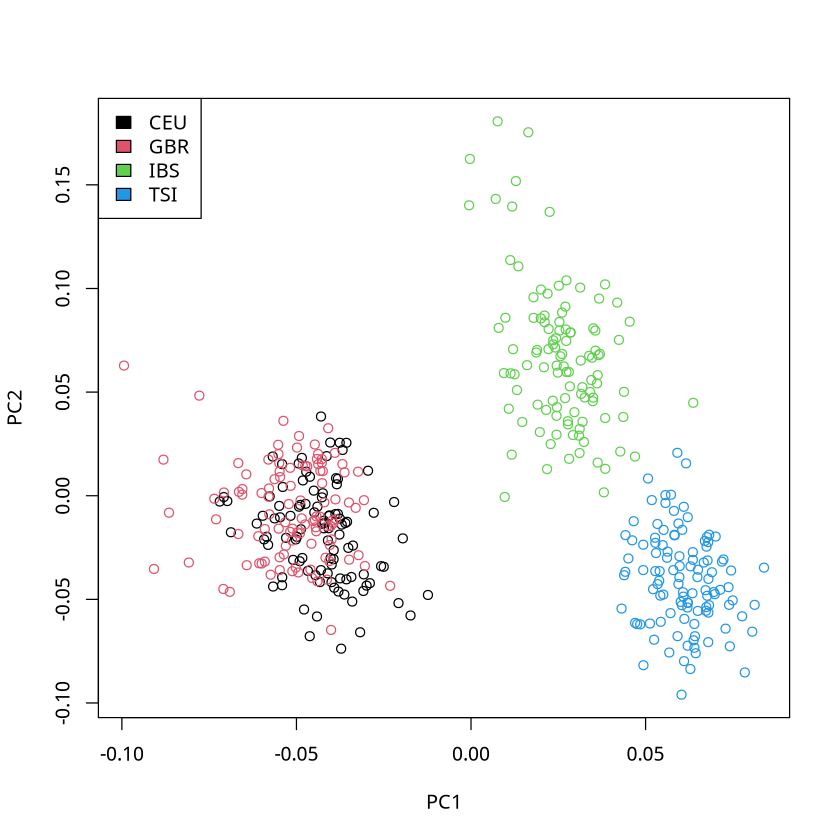

In [35]:
 ## R
 cov <- as.matrix(read.table("./pca/EUsmall.cov"))

 e<-eigen(cov)
 ID<-read.table("./pca/eu1000g.sample.Info",head=T,stringsAsFactors=T)
 plot(e$vectors[,1:2],col=ID$POP,xlab="PC1",ylab="PC2")

 legend("topleft",fill=1:4,levels(ID$POP))


 - Does the plot look like you expected? Which populations are close and distant to each other?

Since the European individuals in 1000G are not simple homogeneous disjoint populations it is hard to use PBS/FST or similar statistics to infer selection based on populating differences ( you will learn about these later). However, PCA offers a good description of the differences between individuals without having the define disjoint groups.

Let's try to infer selection along the genome based on the PCA



In [36]:

pcangsd -b ./pca/eu1000g.small.beagle.gz -o ./pca/EUsmall --selection --sites-save --maf 0 -t 2


------------------------------------
PCAngsd v1.36.4
Jonas Meisner and Anders Albrechtsen
Using 2 thread(s)
------------------------------------

Parsing Beagle file.
Loaded 161428 sites and 424 samples.
Estimating minor allele frequencies.
EM (MAF) converged at iteration: 3

Estimating covariance matrix.
Using 1 principal components (MAP test).
Individual allele frequencies estimated (1).
Individual allele frequencies estimated (2).	RMSE=0.0043002
Individual allele frequencies estimated (3).	RMSE=0.0018805
Individual allele frequencies estimated (4).	RMSE=0.0009594
Individual allele frequencies estimated (5).	RMSE=0.0005523
Individual allele frequencies estimated (6).	RMSE=0.0003511
Individual allele frequencies estimated (7).	RMSE=0.0002419
Individual allele frequencies estimated (8).	RMSE=0.0001775
Individual allele frequencies estimated (9).	RMSE=0.0001367
Individual allele frequencies estimated (10).	RMSE=0.0001090
Individual allele frequencies estimated (11).	RMSE=0.0000893
Indiv


The analysis takes aboud two minutes. We also need to keep track of whether a SNP is used in the analysis or not, which can be done based on the output. Create a file with the SNP location info that you will need to plot the results (the third column indicate if the site is used=1 or not =0):



In [37]:
# Create file with position and chromosome
paste <(zcat ./pca/eu1000g.small.beagle.gz| cut -f 1 | sed 's/\_/\t/g' | sed 1d ) ./pca/EUsmall.sites  > ./pca/EUsmall.sites.info

head  ./pca/EUsmall.sites.info 


(anders) (anders) (anders) chr1	787290	1
chr1	832873	1
chr1	855316	1
chr1	872843	1
chr1	893503	1
chr1	914838	1
chr1	931513	1
chr1	954724	1
chr1	975014	1
chr1	993036	1
(anders) 


Next, plot the results of the selection scan



In [38]:
ls ./pca

1000G5popsAdmixK3seed3.qopt   EUsmall.cov             PCANGSD1000G.admix.4.Q
1000G5popsAdmixK4seed9.qopt   EUsmall.log             PCANGSD1000G.cov
1000G5pops.inputgl.beagle.gz  EUsmall.selection       PCANGSD1000G_iter0.cov
1000G5pops.pop.info           EUsmall.sites           PCANGSD1000G_iter0.log
eu1000g.sample.Info           EUsmall.sites.info      PCANGSD1000G.log
eu1000g.small.beagle.gz       PCANGSD1000G.admix.4.P
(anders) 


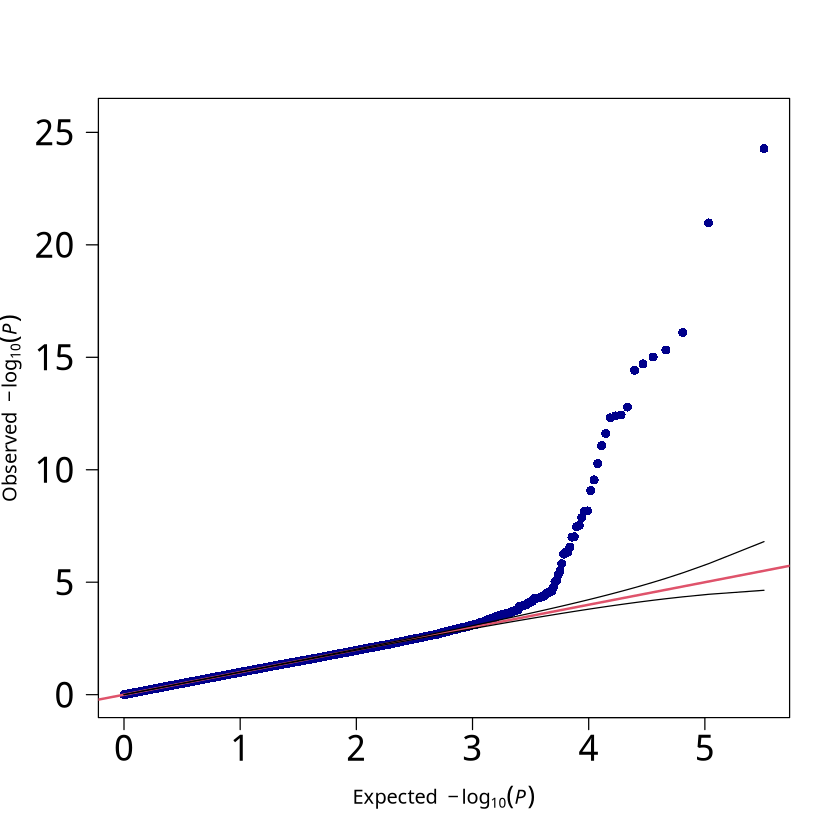

In [39]:

# read in pvalues from seleciton scan
s <- read.table("./pca/EUsmall.selection")$V1

# convert test statistic to p-value
pval<-pchisq(s,1,lower=FALSE)

## make QQ plot to QC the test statistics
qqPlot(pval)


The above is a QQ plot of the p-values from the selection scan. If the test statistics is good them most point will follow the red line which only a few (<1%) will deviate.

 - Did the test perform well?
 
 Finally, let's plot the results of the scan along the genome:  

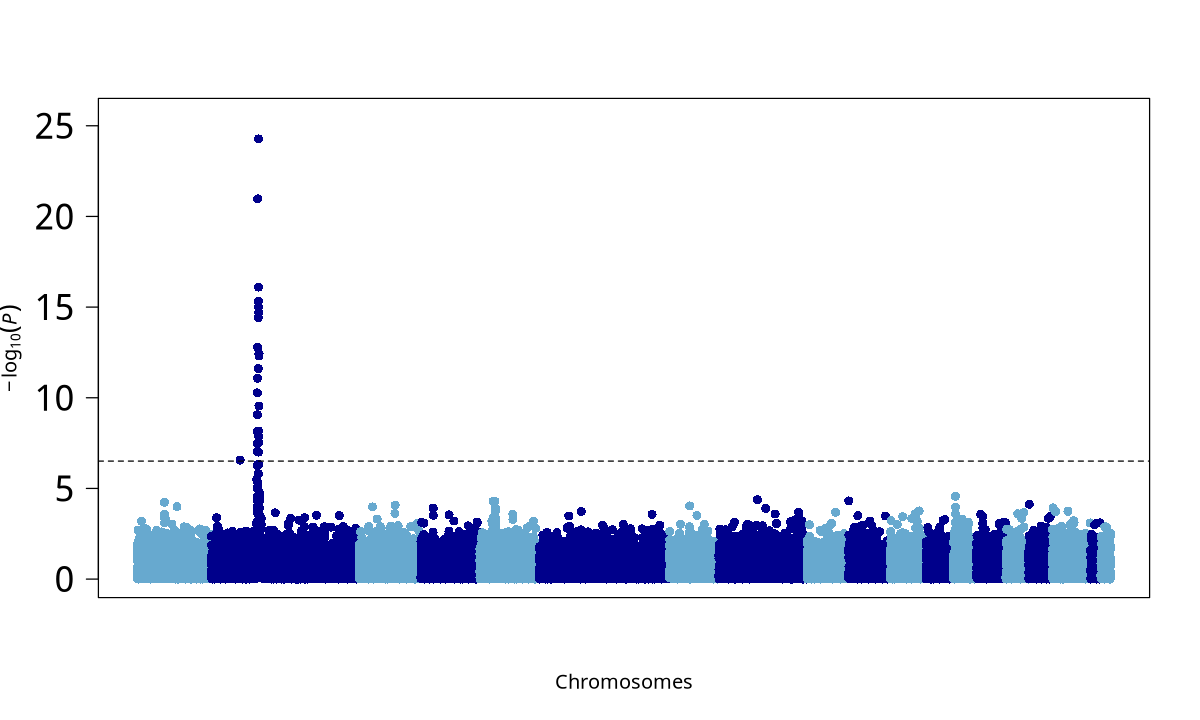

In [40]:


## read positions (hg38)
data<-read.delim("./pca/EUsmall.sites.info",colC=c("factor","integer","integer"),head=F)
names(data)<-c("chr","pos","keep")
data <- subset(data,keep==1)
data$pval <- pval 


## make manhatten plot
options(repr.plot.width = 10, repr.plot.height = 6)
manPlot(data$pval,chr=as.integer(data$chr))




Let's zoom in 

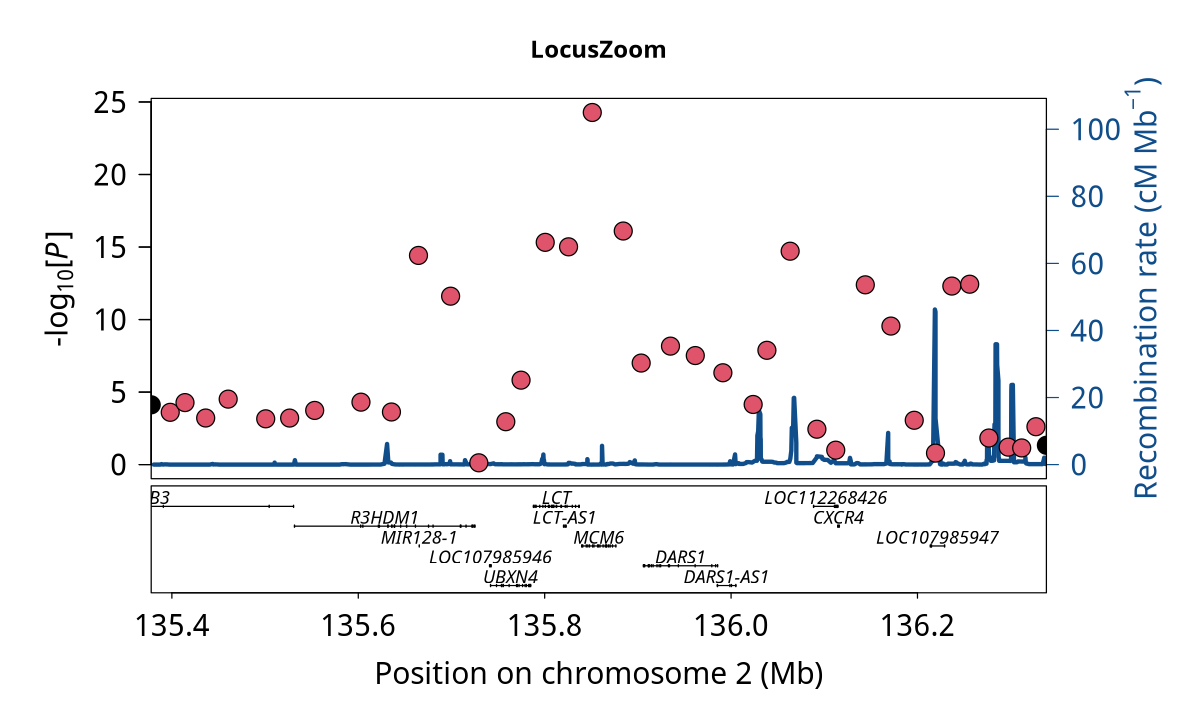

In [41]:

#genetic_map_38 <- "/home/tch_wyd/myname/shared/locuszoom_ref/hg38/genetic_map_GRCh38_chr"
#refgene_38 <- "/home/tch_wyd/myname/shared/locuszoom_ref/refGeneHG38.gz"

# select sites to plot, 0.5Mb on either side of SNP
leadSNPposition <- data$pos[which.max(s)]
region <- subset(data,chr=="chr2" & pos >  leadSNPposition - 5e5 &  pos < leadSNPposition + 5e5)

#plot
locusZoomNoLD(region$pval,chr=2,pos=region$pos,main="LocusZoom",build=38, geneticMap = genetic_map_38, refGenes = refgene_38)



See if you can make sense of the top hit. What do you think it the relevant gene in  that locus